In [3]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
# laod dataset 
df = pd.read_csv('youtubers_df.csv')

In [5]:
df.columns = df.columns.str.lower()

In [6]:
 # remove the sing of á í ó ú in a country column
df['country'] = df['country'].str.replace('á','a')
df['country'] = df['country'].str.replace('í','i')
df['country'] = df['country'].str.replace('ó','o')
df['country'] = df['country'].str.replace('ú','u')
df['country'] = df['country'].str.replace('ñ','n')


In [7]:
df['categories'] = df['categories'].str.replace('á','a')
df['categories'] = df['categories'].str.replace('í','i')
df['categories'] = df['categories'].str.replace('ó','o')
df['categories'] = df['categories'].str.replace('ú','u')
df['categories'] = df['categories'].str.replace('ñ','n')

# romove space and comma
df['categories'] = df['categories'].str.replace(' ','_')
df['categories'] = df['categories'].str.replace(',','')

In [8]:
df.head()

,rank,username,categories,suscribers,country,visits,likes,comments,links
0,1,tseries,Musica_y_baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,Videojuegos_Humor,183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educacion,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,Animacion_Juguetes,113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [9]:
# check the tail of the dataset 
df.tail()


,rank,username,categories,suscribers,country,visits,likes,comments,links
995,996,hamzymukbang,NaN,11700000.0,Estados Unidos,397400.0,14000.0,124.0,http://youtube.com/channel/UCPKNKldggioffXPkSm...
996,997,Adaahqueen,NaN,11700000.0,India,1100000.0,92500.0,164.0,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...
997,998,LittleAngelIndonesia,Musica_y_baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...
998,999,PenMultiplex,NaN,11700000.0,India,14000.0,81.0,1.0,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...
999,1000,OneindiaHindi,Noticias_y_Politica,11700000.0,India,2200.0,31.0,1.0,http://youtube.com/channel/UCOjgc1p2hJ4GZi6pQQ...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rank        1000 non-null   int64  
 1   username    1000 non-null   object 
 2   categories  694 non-null    object 
 3   suscribers  1000 non-null   float64
 4   country     1000 non-null   object 
 5   visits      1000 non-null   float64
 6   likes       1000 non-null   float64
 7   comments    1000 non-null   float64
 8   links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


In [11]:
df.shape

(1000, 9)

In [12]:
df.dtypes

rank            int64
username       object
categories     object
suscribers    float64
country        object
visits        float64
likes         float64
comments      float64
links          object
dtype: object

In [13]:
df.describe()

,rank,suscribers,visits,likes,comments
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,500.500000,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,288.819436,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,250.750000,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,500.500000,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,750.250000,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


In [14]:
df.isnull().sum()

rank            0
username        0
categories    306
suscribers      0
country         0
visits          0
likes           0
comments        0
links           0
dtype: int64

In [15]:
df.isnull().sum()/len(df)*100


rank           0.0
username       0.0
categories    30.6
suscribers     0.0
country        0.0
visits         0.0
likes          0.0
comments       0.0
links          0.0
dtype: float64

<AxesSubplot: >

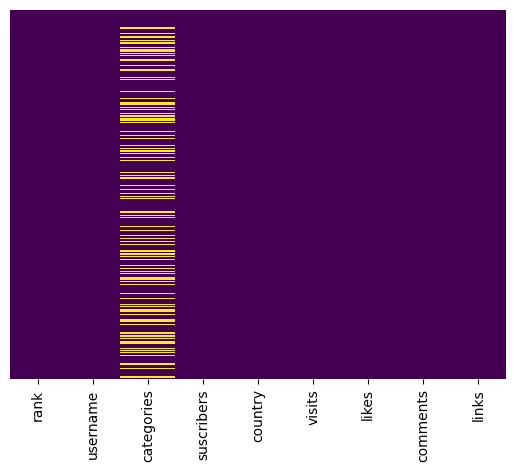

In [16]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [17]:
df.columns

Index(['rank', 'username', 'categories', 'suscribers', 'country', 'visits',
       'likes', 'comments', 'links'],
      dtype='object')

In [18]:
# impute missing value in categoies columns
df['categories'] = df['categories'].fillna(df['categories'].mode()[0])

In [19]:
df.isnull().sum()

rank          0
username      0
categories    0
suscribers    0
country       0
visits        0
likes         0
comments      0
links         0
dtype: int64

In [20]:
df ['country'].value_counts() 

Estados Unidos    293
India             241
Unknown           171
Brasil             64
México             58
Indonesia          38
Rusia              25
Tailandia          18
Colombia           16
Filipinas          13
Pakistan           11
Argentina           7
Egipto              5
Francia             4
Turquia             4
Arabia Saudita      4
Espana              4
Iraq                4
Japon               3
Bangladesh          3
Reino Unido         3
Marruecos           2
Argelia             2
Peru                2
Singapur            1
Ecuador             1
Jordania            1
El Salvador         1
Somalia             1
Name: country, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Estados Unidos'),
  Text(1, 0, 'India'),
  Text(2, 0, 'Unknown'),
  Text(3, 0, 'Brasil'),
  Text(4, 0, 'México')])

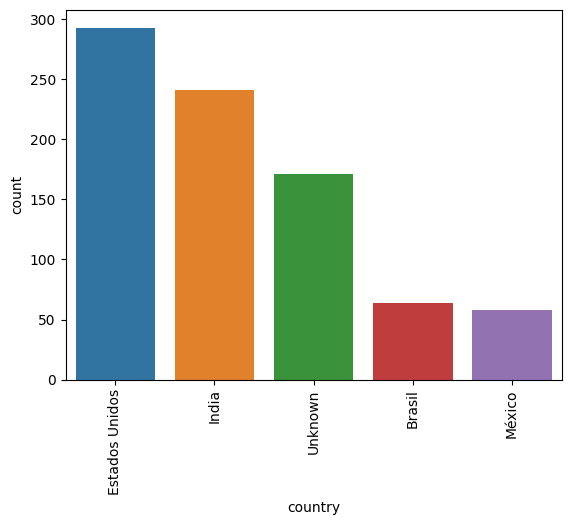

In [21]:
sns.countplot(x= 'country',data=df,order=df['country'].value_counts().index[:5])
# rotate x-trick text
plt.xticks(rotation=90)

In [22]:
px.bar(x= df['country'].value_counts().index,y= df['country'].value_counts())


<AxesSubplot: xlabel='country', ylabel='count'>

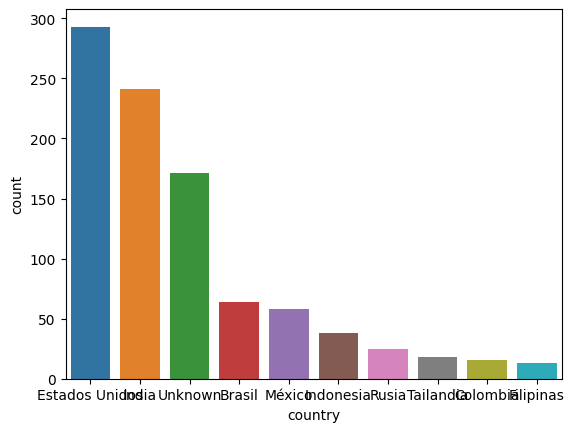

In [23]:
sns.countplot(x= 'country',data=df,order=df['country'].value_counts().index[:10])


In [24]:
df ['categories'].value_counts() 

Musica_y_baile                       466
Peliculas_Animacion                   61
Musica_y_baile_Peliculas              41
Vlogs_diarios                         37
Noticias_y_Politica                   36
Peliculas_Humor                       34
Animacion_Videojuegos                 34
Animacion_Juguetes                    29
Animacion_Humor                       27
Peliculas                             24
Educacion                             24
Animacion                             22
Videojuegos                           19
Videojuegos_Humor                     17
Musica_y_baile_Animacion              16
Ciencia_y_tecnologia                  14
Comida_y_bebida                       12
Humor                                 10
Juguetes                              10
Peliculas_Juguetes                     9
Peliculas_Videojuegos                  8
Deportes                               8
Musica_y_baile_Humor                   6
Juguetes_Coches_y_vehiculos            4
DIY_y_Life_Hacks

<AxesSubplot: xlabel='categories', ylabel='count'>

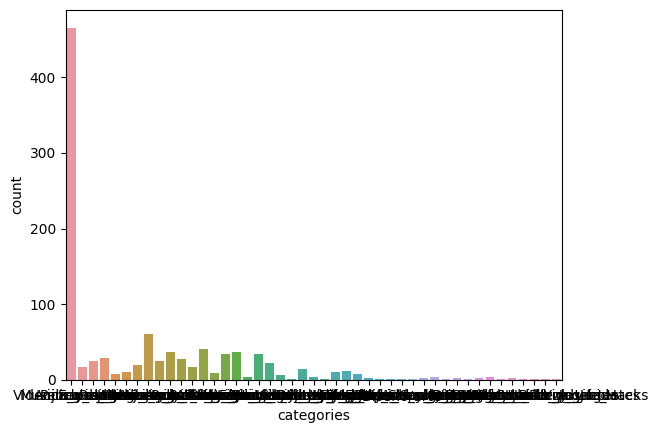

In [25]:
sns.countplot(x= 'categories',data=df)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Musica_y_baile'),
  Text(1, 0, 'Peliculas_Animacion'),
  Text(2, 0, 'Musica_y_baile_Peliculas'),
  Text(3, 0, 'Vlogs_diarios'),
  Text(4, 0, 'Noticias_y_Politica')])

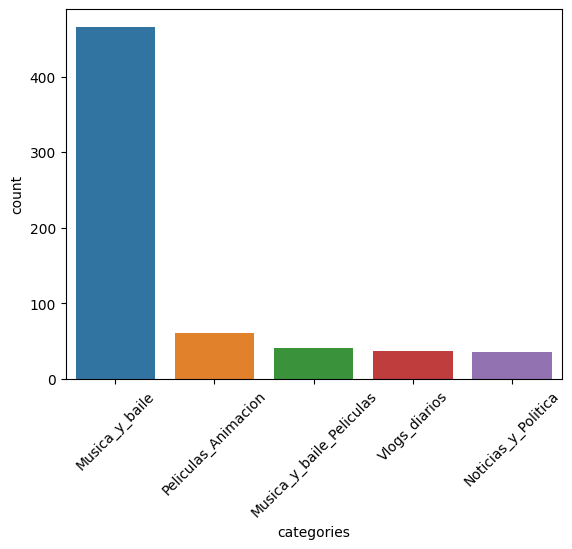

In [26]:
sns.countplot(x= 'categories',data=df,order=df['categories'].value_counts().index[:5])
# rotate x-trick text
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Musica_y_baile'),
  Text(1, 0, 'Peliculas_Animacion'),
  Text(2, 0, 'Musica_y_baile_Peliculas'),
  Text(3, 0, 'Vlogs_diarios'),
  Text(4, 0, 'Noticias_y_Politica'),
  Text(5, 0, 'Peliculas_Humor'),
  Text(6, 0, 'Animacion_Videojuegos'),
  Text(7, 0, 'Animacion_Juguetes'),
  Text(8, 0, 'Animacion_Humor'),
  Text(9, 0, 'Peliculas')])

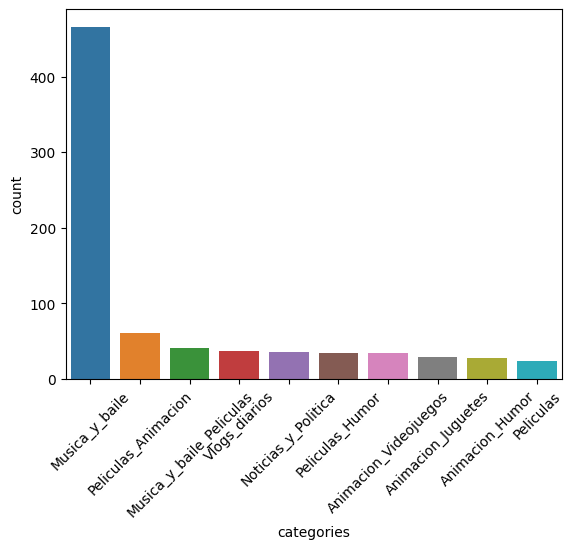

In [27]:
sns.countplot(x= 'categories',data=df,order=df['categories'].value_counts().index[:10])
# rotate x-trick text
plt.xticks(rotation=45)

In [28]:
px.bar(x= df['categories'].value_counts().index,y= df['categories'].value_counts())


In [29]:
px.bar(x= df['categories'].value_counts().index[:10],y= df['categories'].value_counts()[:10])


In [30]:
# now i want to check comments, which country give a more comments 

df.groupby('country')['comments'].sum().sort_values(ascending=False)
# this will show me the sum of comment count for each country but how can i see only top 10 countries with most comments?

country
Estados Unidos    614890.0
India             243270.0
Brasil            183687.0
Rusia              75122.0
México             69959.0
Indonesia          22093.0
Iraq               20559.0
Filipinas          13293.0
Reino Unido         8233.0
Argentina           7468.0
Colombia            5941.0
Arabia Saudita      5756.0
Peru                3367.0
Somalia             2900.0
Japon               2415.0
Tailandia           2155.0
El Salvador         2100.0
Argelia             1424.0
Unknown             1400.0
Turquia             1188.0
Espana               745.0
Pakistan             321.0
Francia              240.0
Egipto               116.0
Bangladesh            64.0
Singapur              26.0
Marruecos             19.0
Ecuador               17.0
Jordania               0.0
Name: comments, dtype: float64

In [31]:
# check the value counts between country and comments which is the top country 
df.groupby('country')['comments'].sum().sort_values(ascending=False).head(10)


country
Estados Unidos    614890.0
India             243270.0
Brasil            183687.0
Rusia              75122.0
México             69959.0
Indonesia          22093.0
Iraq               20559.0
Filipinas          13293.0
Reino Unido         8233.0
Argentina           7468.0
Name: comments, dtype: float64

In [32]:
# make plot  between country and com# make plot  between country and comments which is the top country using plotly

px.bar(x= df.groupby('country')['comments'].sum().sort_values(ascending=False).head(10).index,y= df.groupby('country')['comments'].sum().sort_values(ascending=False).head(10))



In [33]:
df.columns

Index(['rank', 'username', 'categories', 'suscribers', 'country', 'visits',
       'likes', 'comments', 'links'],
      dtype='object')

In [34]:
# check the outlier in dataest in plotlty 
px.box(df,x='country',y='suscribers',color='country')



In [35]:
# correlation between the number of subscribers and the number of likes or comments
df[['suscribers','comments']].corr()


,suscribers,comments
suscribers,1.00000,0.03635
comments,0.03635,1.00000


In [36]:

# check the distribution of streamers by country
px.histogram(df,x='country',color='country')

In [37]:

# check the distribution of streamers by country
df['country'].value_counts()


Estados Unidos    293
India             241
Unknown           171
Brasil             64
México             58
Indonesia          38
Rusia              25
Tailandia          18
Colombia           16
Filipinas          13
Pakistan           11
Argentina           7
Egipto              5
Francia             4
Turquia             4
Arabia Saudita      4
Espana              4
Iraq                4
Japon               3
Bangladesh          3
Reino Unido         3
Marruecos           2
Argelia             2
Peru                2
Singapur            1
Ecuador             1
Jordania            1
El Salvador         1
Somalia             1
Name: country, dtype: int64

In [38]:
df['suscribers'].nunique()

274

In [39]:
# check the distribution of streamers by suscribers
px.histogram(df,x='suscribers',y='country')


In [40]:
#Calculate and visualize the average number of subscribers, visits, likes, and comments.
#Are there patterns or anomalies in these metrics

df.columns
['id', 'subscriber_count', 'visit_count', 'like_count', 'comment_count']

df[['suscribers','likes','comments']].mean()


suscribers    2.189440e+07
likes         5.363259e+04
comments      1.288768e+03
dtype: float64

In [41]:
#Calculate and visualize the average number of subscribers, visits, likes, and comments.
#Are there patterns or anomalies in these metrics using  pie chart from plotly

px.pie(df,values=df[['suscribers','likes','comments']].mean(),names=df[['suscribers','likes','comments']].mean()
.index)

In [42]:
df.columns

Index(['rank', 'username', 'categories', 'suscribers', 'country', 'visits',
       'likes', 'comments', 'links'],
      dtype='object')

In [43]:

# Define a function to calculate the average view count per 3 category

def calculate_average_view_count(df):
    average_view_count = df['comments'].mean()
    return average_view_count


# Use the defined function to calculate the average view count per category
average_view_count = calculate_average_view_count(df)

print("The average view count per category is: ", average_view_count)

The average view count per category is:  1288.768


In [ ]:
# import libraries

